In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [21]:
sys_energy = pd.read_csv('energy_output.csv')
# sys_energy_euler = pd.read_csv('energy_output_euler.csv')

In [22]:
sys_energy.head()

,t,celestialEnergy,centaur_0,centaur_1,centaur_2,centaur_3,centaur_4,centaur_5,centaur_6,centaur_7,...,centaur_893,centaur_894,centaur_895,centaur_896,centaur_897,centaur_898,centaur_899,centaur_900,centaur_901,centaur_902
0,0,-1.452560e+39,-1.329820e+11,-1.654280e+11,-1.279400e+11,-1.443600e+11,-1.346330e+11,-1.130520e+11,-1.478720e+11,-1.385240e+11,...,-1.319320e+11,-1.319310e+11,-1.319340e+11,-1.319320e+11,-1.319310e+11,-1.319340e+11,-1.319320e+11,-1.319310e+11,-1.319340e+11,-1.319320e+11
1,100000,-1.452560e+39,-1.342400e+11,-1.650040e+11,-1.279660e+11,-1.435040e+11,-1.346520e+11,-1.129980e+11,-1.476640e+11,-1.387050e+11,...,-1.318360e+11,-1.312190e+11,-1.321400e+11,-1.318410e+11,-1.313550e+11,-1.321210e+11,-1.318490e+11,-1.314910e+11,-1.321020e+11,-1.318590e+11
2,200000,-1.452560e+39,-1.342730e+11,-1.651680e+11,-1.272970e+11,-1.434810e+11,-1.346980e+11,-1.129460e+11,-1.478210e+11,-1.389620e+11,...,-1.319550e+11,-1.313330e+11,-1.322640e+11,-1.319600e+11,-1.314690e+11,-1.322450e+11,-1.319670e+11,-1.316040e+11,-1.322260e+11,-1.319760e+11
3,300000,-1.452560e+39,-1.345520e+11,-1.650280e+11,-1.272310e+11,-1.440100e+11,-1.346670e+11,-1.129810e+11,-1.479960e+11,-1.386670e+11,...,-1.314790e+11,-1.310490e+11,-1.318810e+11,-1.314910e+11,-1.310730e+11,-1.318870e+11,-1.315040e+11,-1.310740e+11,-1.318900e+11,-1.315180e+11
4,400000,-1.452560e+39,-1.342840e+11,-1.651370e+11,-1.276800e+11,-1.442090e+11,-1.347440e+11,-1.131000e+11,-1.481450e+11,-1.386840e+11,...,-1.315830e+11,-1.312570e+11,-1.319680e+11,-1.315930e+11,-1.312380e+11,-1.319740e+11,-1.316050e+11,-1.312100e+11,-1.319790e+11,-1.316170e+11


In [23]:
sys_energy_change = sys_energy.diff(axis=0)

In [24]:
centaur_changes = sys_energy_change.iloc[:, 2:]  # e.g. col 0="t", col 1="celestialEnergy", rest=centaurs

# largest/smallest absolute jump for each centaur over all timesteps
max_abs_jumps = centaur_changes.abs().max(axis=0)
min_abs_jumps = centaur_changes.abs().min(axis=0)


max_abs_jumps = max_abs_jumps.sort_values(ascending=False)
min_abs_jumps = min_abs_jumps.sort_values(ascending=True)

In [25]:
max_abs_jumps.head(20)

centaur_191    3.870100e+10
centaur_171    3.248400e+10
centaur_857    3.147200e+10
centaur_860    2.983500e+10
centaur_854    2.762300e+10
centaur_855    2.717800e+10
centaur_852    2.510600e+10
centaur_152    1.959300e+10
centaur_851    1.897400e+10
centaur_849    1.744700e+10
centaur_858    1.692000e+10
centaur_276    1.663700e+10
centaur_879    1.584500e+10
centaur_39     1.466100e+10
centaur_848    1.301300e+10
centaur_587    1.253500e+10
centaur_720    1.202100e+10
centaur_866    1.179000e+10
centaur_846    1.132000e+10
centaur_863    1.129600e+10
dtype: float64

In [26]:
min_abs_jumps.head(30)

centaur_582          0.0
centaur_17           0.0
centaur_577          0.0
centaur_229          0.0
centaur_664          0.0
centaur_382          0.0
centaur_385          0.0
centaur_845          0.0
centaur_579          0.0
centaur_309          0.0
centaur_152          0.0
centaur_627          0.0
centaur_156          0.0
centaur_464          0.0
centaur_851          0.0
centaur_626          0.0
centaur_708          0.0
centaur_1            0.0
centaur_726          0.0
centaur_680          0.0
centaur_226    1000000.0
centaur_668    1000000.0
centaur_810    1000000.0
centaur_804    1000000.0
centaur_807    1000000.0
centaur_55     1000000.0
centaur_601    1000000.0
centaur_611    1000000.0
centaur_861    1000000.0
centaur_585    1000000.0
dtype: float64

In [27]:
# For each column, find the row-index at which the absolute change is largest
idx_of_max = centaur_changes.abs().idxmax()
print(idx_of_max.head(10))


centaur_0    5
centaur_1    1
centaur_2    8
centaur_3    1
centaur_4    8
centaur_5    9
centaur_6    1
centaur_7    5
centaur_8    3
centaur_9    5
dtype: int64


In [28]:
sys_energy1 = sys_energy.drop('celestialEnergy', axis=1)

In [29]:
sys_energy_change = sys_energy.diff(axis=0)


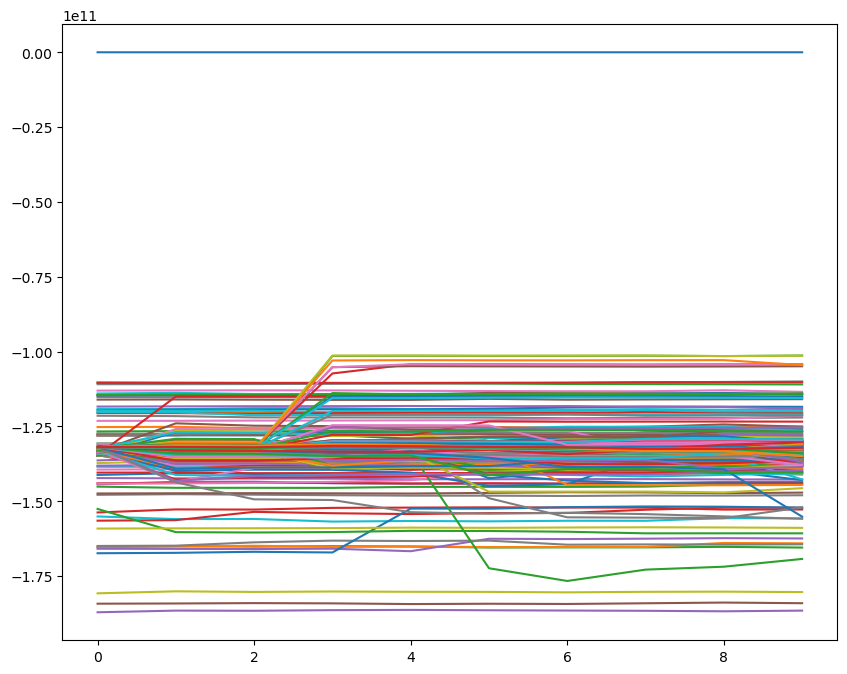

In [30]:
plt.figure(figsize=(10,8))
plt.plot(sys_energy1)

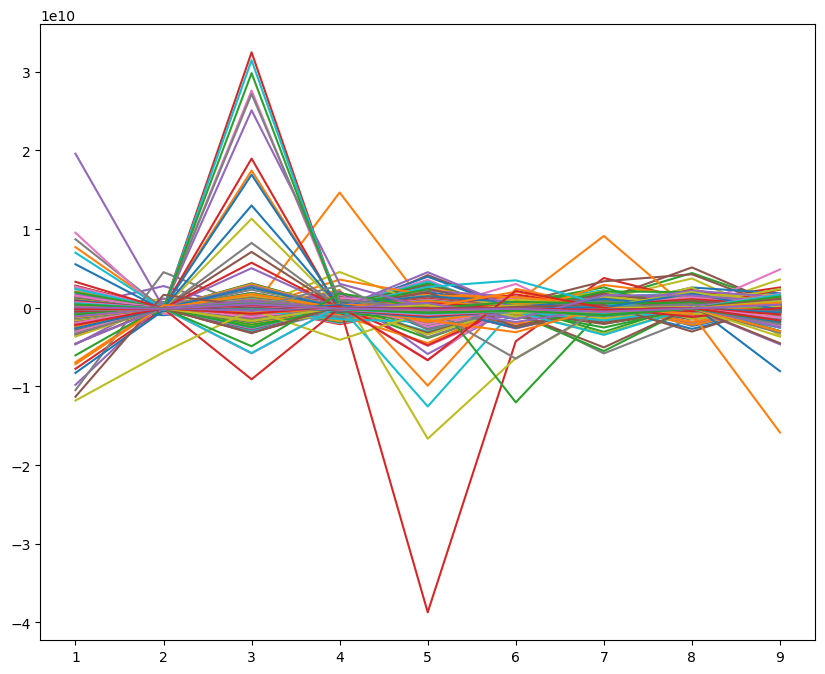

In [31]:
plt.figure(figsize=(10,8))
plt.plot(sys_energy_change)

In [33]:
# plt.plot(sys_energy['t'], sys_energy['centaurEnergy'], label='Verlet', color='red')
# plt.plot(sys_energy_euler['t'], sys_energy_euler['centaurEnergy'], label='Euler', color='blue')
# plt.legend()
# # plt.ylim(-1.4525e39, -1.45275e39)